# Code Challenge - Predicting Customer Buying Behaviour

***
*Author: Kadriye Nur Bakirci*
***
Contact regarding the code: nur.bakirci@gmail.com
***

This notebook solves customer buying behaviour prediction task given 1 tabular datasets.

This notebook is divided into 8 main sections.



1.   **Environment Setup**
2.   **Data Preparation**
3.   **Feature Engineering**
4.   **Exploratory Data Analysis**
5.   **Data Preprocessing**
6.   **Correlation Analysis**
7.   **Data Preparation for ML**
8.   **Model Implementation**

[Datasets Location](https://github.com/kadnur/BritishAirwaysCaseStudy/blob/main/Data/customer_booking.csv)

## Prepare the Environment

### Import Libraries

General Use Libraries

In [69]:
# Import important libraries
import pandas as pd
import numpy as np

# Libraries for graphs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
import plotly.express as px

# Library for statistical test
import statsmodels.api as sm
from sklearn.feature_selection import chi2

# Data Preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Performance Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predictive Models
from sklearn.ensemble import RandomForestClassifier

# Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Kfold parameters are imported for checking model accuracy
from sklearn.model_selection import KFold, cross_val_score

# Plot feature importance
from xgboost import plot_importance

# Define some rules of displaying DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

### Import the Data

Clone repository containing the data.

In [70]:
# Clone the repo containing the raw data
!git clone -l -s https://github.com/kadnur/BritishAirwaysCaseStudy.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 11 (delta 1), pack-reused 0
Receiving objects: 100% (19/19), 2.77 MiB | 20.86 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [71]:
# Move to the relative path containing the cloned repo's data
%cd cloned-repo/Data
!ls

/content/cloned-repo/Data/cloned-repo/Data
BA_reviews.csv	customer_booking.csv


Convert the dataset files into Pandas Dataframes.

**DataFrame 1** : *Customer Booking*

In [72]:
# Read Customer Booking csv data file
booking = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

## Data Preparation

### Booking - Analysis

Explore the first 10 instances of Booking.

In [73]:
# Check the head as a sanity check of correct loading of the data
booking.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


Get an overall insight on Booking dataframe content.

In [74]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{booking.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{booking.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{booking.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{booking.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{booking.describe(include = object).transpose()}')

Dataset shape:
(50000, 14)

Dataset attributes:
Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin  

Do a direct call for printing missing values.

In [75]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((booking.isnull().sum() / len(booking))) * 100}\n')

Percentage of Null Values per Feature
num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64



We don't have any missing value so there is no need for any implementation of handling missing value techniques.

## Feature Engineering

Create copy of the raw data before making transformations.

In [76]:
# Make a copy of the raw datasets to keep the original information untouched
df_booking= booking.copy()

Now before going any further let's check all data types are correct.

In [77]:
# Check data types are correct or not
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Create new feature for if flight is in weekend or not.

In [78]:
# Extract date features
weekdays = ['Wed', 'Thu', 'Mon', 'Tue', 'Fri']
df_booking['flight_day_weekend'] = df_booking['flight_day'].apply(lambda x: 1 if x in weekdays else 0)

# Check dataframe
df_booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_weekend
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1


The format of flight_duration feature, represented as 5.52 to denote 5 hours and 52 minutes, can be misleading if interpreted directly by most algorithms, as they might read it simply as 5.52 hours. Since this notation mixes hours and minutes in a decimal format rather than the more typical time representation, it could potentially confuse the model or lead to inaccuracies in interpretation.

In [79]:
def convert_hours_to_minutes(time):
    hours = int(time)
    # Extract minutes from the decimal part
    minutes = int((time - hours) * 100)
    total_minutes = hours * 60 + minutes
    return total_minutes

# Assuming df is your DataFrame and flight_hour is your column
df_booking['flight_minutes'] = df_booking['flight_duration'].apply(convert_hours_to_minutes)

# Check dataset
df_booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_weekend,flight_minutes
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,351
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,351
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1,351
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,351
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1,351


Interaction features involve creating new variables that represent the interaction between two or more existing features. These are particularly useful in capturing effects that arise from the combination of features.

In [80]:
# For baggage
df_booking['passenger_x_baggage'] = df_booking['num_passengers'] * df_booking['wants_extra_baggage']
# For meal
df_booking['passenger_x_meal'] = df_booking['num_passengers'] * df_booking['wants_in_flight_meals']
# For seat
df_booking['passenger_x_seat'] = df_booking['num_passengers'] * df_booking['wants_preferred_seat']
# Check dataset
df_booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_weekend,flight_minutes,passenger_x_baggage,passenger_x_meal,passenger_x_seat
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,351,2,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,351,0,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1,351,2,0,2
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,351,0,1,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1,351,2,2,0


## Exploratory Data Analysis

### Duplicated Instances

Check the number of duplicated rows in DataFrame.

In [81]:
# Print the number of duplicated rows for df_booking data
print(f'The number of duplicated rows in booking DataFrame is {df_booking.duplicated().sum()} out of {df_booking.shape[0]} rows.')

The number of duplicated rows in booking DataFrame is 719 out of 50000 rows.


Drop duplicates

In [82]:
# keep = 'first' : Drops duplicates except for the first occurrence.
# inplace = True: Modify the DataFrame rather than creating a new one.

# Drop duplicates for df_booking
df_booking.drop_duplicates(keep='first', inplace=True)

Re-check the number of duplicated rows

In [83]:
# Print the number of duplicated rows for df_booking
print(f'The number of duplicated rows in Booking is {df_booking.duplicated().sum()} out of {df_booking.shape[0]} rows.')

The number of duplicated rows in Booking is 0 out of 49281 rows.


### Subset Dataset

Drop the irrelevant columns.

In [84]:
# Check column names
df_booking.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'flight_day_weekend', 'flight_minutes', 'passenger_x_baggage',
       'passenger_x_meal', 'passenger_x_seat'],
      dtype='object')

In [85]:
# Create subset of dataset
df_booking = df_booking[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
                         'length_of_stay', 'flight_hour', 'flight_day','booking_origin',
                         'wants_extra_baggage', 'wants_preferred_seat',
                         'wants_in_flight_meals', 'flight_duration', 'booking_complete',
                         'flight_day_weekend', 'flight_minutes', 'passenger_x_baggage',
                         'passenger_x_meal', 'passenger_x_seat']]

### Dataset Binning

Create bins for flight hour feature.

In [86]:
# Create bins and labels
bins = [4, 5, 6, 8, 10]
labels = ['4~', '6~', '8~', '10~']
df_booking['flight_duration_bins'] = pd.cut(df_booking['flight_duration'], bins=bins, labels=labels, include_lowest=True, right=False)

In [87]:
def categorize_purchase_lead(days):
    if days < 7:
        return 'within_a_week'
    elif 7 <= days < 30:
        return 'within_a_month'
    else:
        return 'more_than_a_month'

# Apply function to dataset
df_booking['purchase_lead_category'] = df_booking['purchase_lead'].apply(categorize_purchase_lead)

# Check dataset
df_booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_weekend,flight_minutes,passenger_x_baggage,passenger_x_meal,passenger_x_seat,flight_duration_bins,purchase_lead_category
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,0,351,2,0,0,6~,more_than_a_month
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,0,351,0,0,0,6~,more_than_a_month
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,1,351,2,0,2,6~,more_than_a_month
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,0,351,0,1,0,6~,more_than_a_month
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,1,351,2,2,0,6~,more_than_a_month


### Sanity Checks

Check in the dataset %85 customers did not complete their booking

In [88]:
# Check the value counts in the feature booking complete
df_booking['booking_complete'].value_counts()[0] / df_booking.shape[0]

0.8500233355654309

In [89]:
# Print the value
print(round(df_booking['booking_complete'].value_counts()[0] / df_booking.shape[0] * 100, 2), "% of our customers did not complete their booking")

85.0 % of our customers did not complete their booking


### Summary Statistics

Check the some statistics could be useful.

In [90]:
# Print the average number of customers
print("The average total number of customers is", round(np.mean(df_booking['num_passengers']),2),
      "and the median is",round(np.median(df_booking['num_passengers']),2) )

The average total number of customers is 1.59 and the median is 1.0


In [91]:
# Print the average purchase lead
print("The average purchase lead is", round(np.mean(df_booking['purchase_lead']),2),
      "and the median is",round(np.median(df_booking['purchase_lead']),2) )

The average purchase lead is 84.72 and the median is 51.0


In [92]:
# Print the average lenght of stay
print("The average lenght of stay is", round(np.mean(df_booking['length_of_stay']),2),
      "and the median is",round(np.median(df_booking['length_of_stay']),2) )

The average lenght of stay is 23.05 and the median is 17.0


Check the distributions.

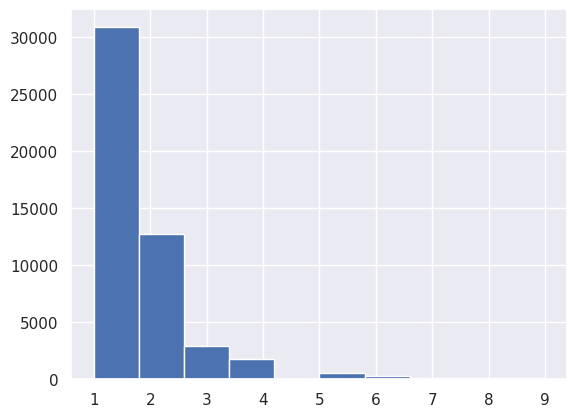

In [93]:
# Check number of passengers distribution
plt.hist(df_booking['num_passengers']);

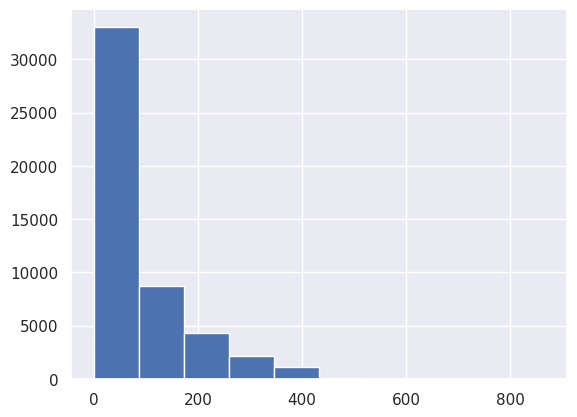

In [94]:
# Check purchase lead distribution
plt.hist(df_booking['purchase_lead']);

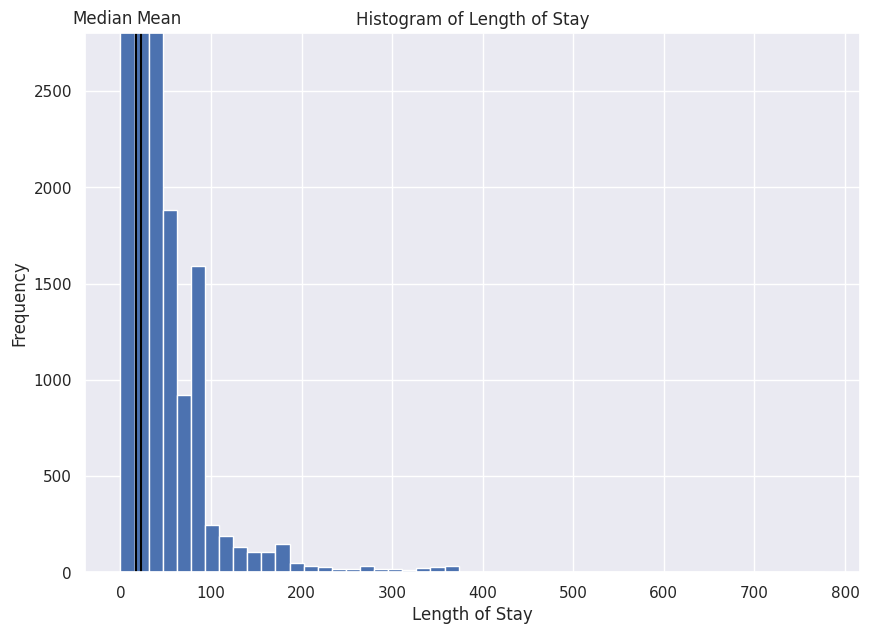

In [95]:
# Improve the length of stay histogram
plt.figure(figsize=(10,7))
plt.hist(df_booking['length_of_stay'],bins=50)

plt.vlines(df_booking['length_of_stay'].mean(),0,2800, colors='Black')
plt.vlines(df_booking['length_of_stay'].median(),0,2800, colors='Black')
plt.text(df_booking['length_of_stay'].mean()-5,2800+50,"Mean")
plt.text(df_booking['length_of_stay'].median()-70,2800+50,"Median")
plt.ylim(0,2800)
plt.title("Histogram of Length of Stay")
plt.ylabel("Frequency")
plt.xlabel("Length of Stay");

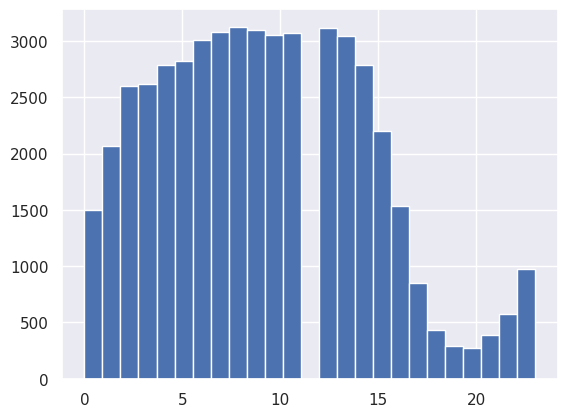

In [96]:
# Plot flight hour distribution
plt.hist(df_booking['flight_hour'],bins=25);

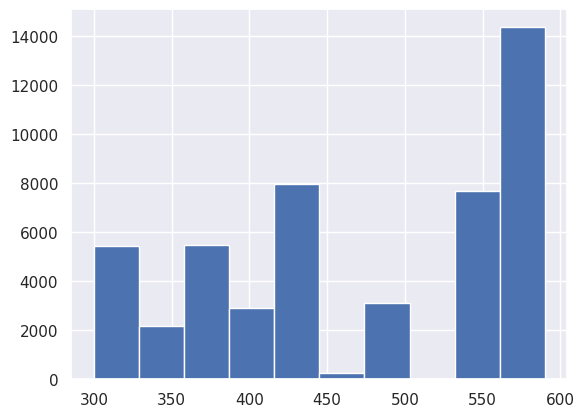

In [97]:
# Plot duration flight minutes distribution
plt.hist(df_booking['flight_minutes'],bins=10);

### Comparing Categories

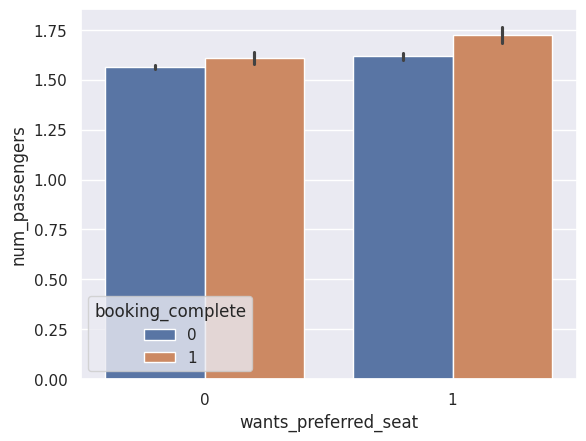

In [98]:
# Create bar chart for number of passengers
sns.barplot(x="wants_preferred_seat", y="num_passengers", data=df_booking, estimator="mean",hue="booking_complete");

In [99]:
# Grouped data
bar_plot = df_booking.groupby(['wants_preferred_seat','booking_complete'])['num_passengers'].mean().reset_index()

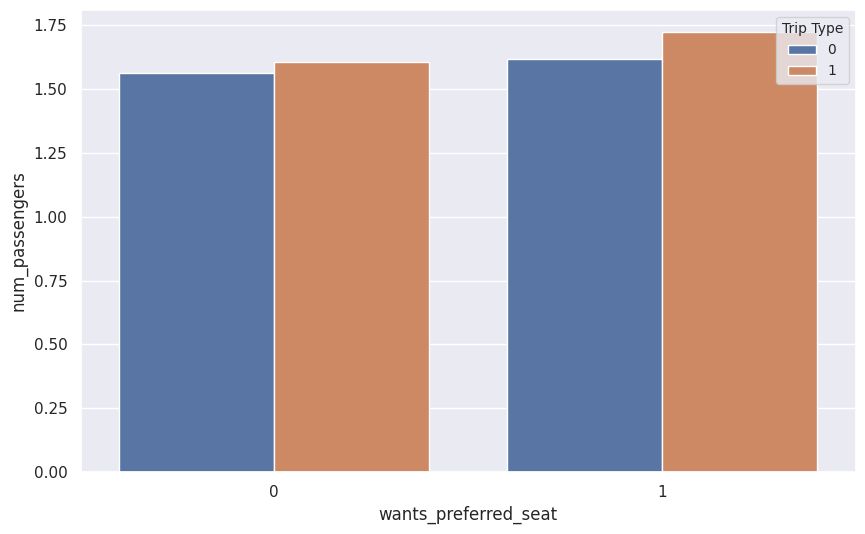

In [100]:
# Adjust the figure size as needed
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x="wants_preferred_seat", y="num_passengers", data=bar_plot, estimator=np.mean, hue="booking_complete")

# Modify the legend
leg = ax.legend(title='Trip Type', loc='upper right', fontsize='small')  # Adjust legend location and fontsize
leg.set_title('Trip Type', prop={'size': 'small'})  # Adjust the title size if needed

# Display the plot
plt.show()

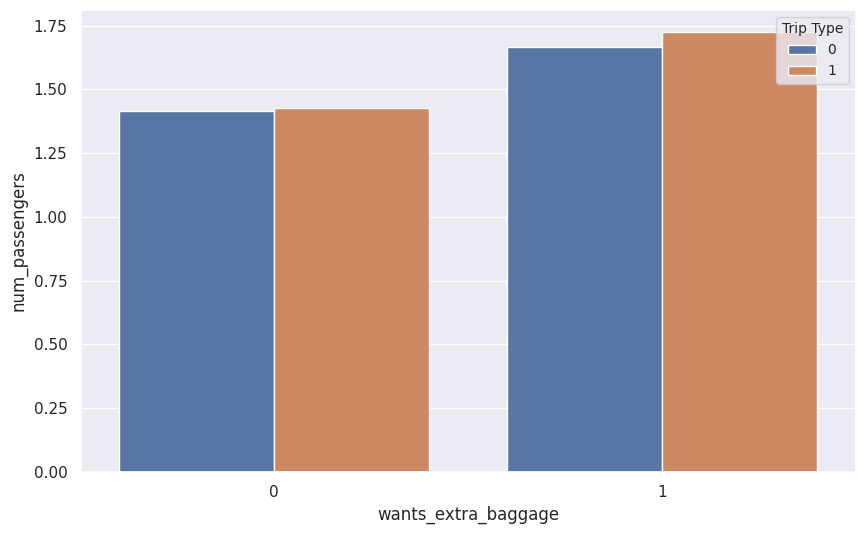

In [101]:
# Grouped data
bar_bag = df_booking.groupby(['wants_extra_baggage','booking_complete'])['num_passengers'].mean().reset_index()

# Adjust the figure size as needed
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x="wants_extra_baggage", y="num_passengers", data=bar_bag, estimator=np.mean, hue="booking_complete")

# Modify the legend
leg = ax.legend(title='Trip Type', loc='upper right', fontsize='small')  # Adjust legend location and fontsize
leg.set_title('Trip Type', prop={'size': 'small'})  # Adjust the title size if needed

# Display the plot
plt.show()

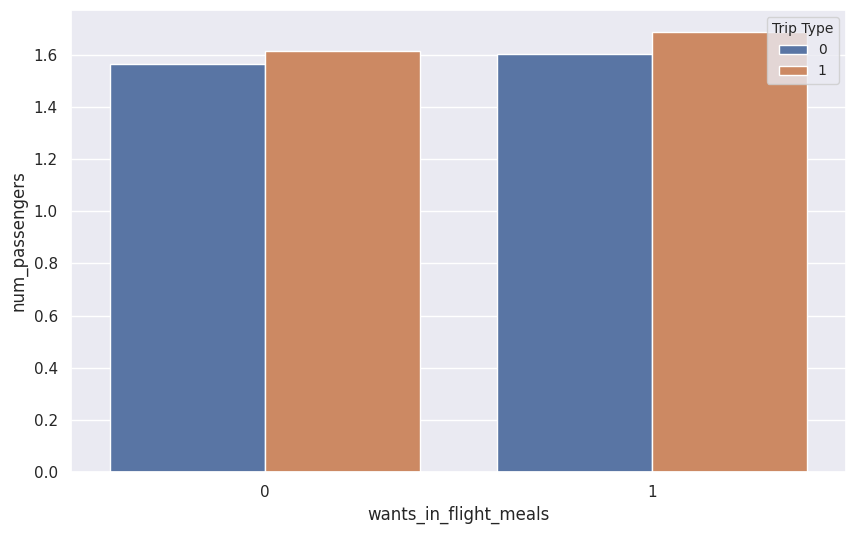

In [102]:
# Grouped data
bar_meal = df_booking.groupby(['wants_in_flight_meals','booking_complete'])['num_passengers'].mean().reset_index()

# Adjust the figure size as needed
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x="wants_in_flight_meals", y="num_passengers", data=bar_meal, estimator=np.mean, hue="booking_complete")

# Modify the legend
leg = ax.legend(title='Trip Type', loc='upper right', fontsize='small')  # Adjust legend location and fontsize
leg.set_title('Trip Type', prop={'size': 'small'})  # Adjust the title size if needed

# Display the plot
plt.show()

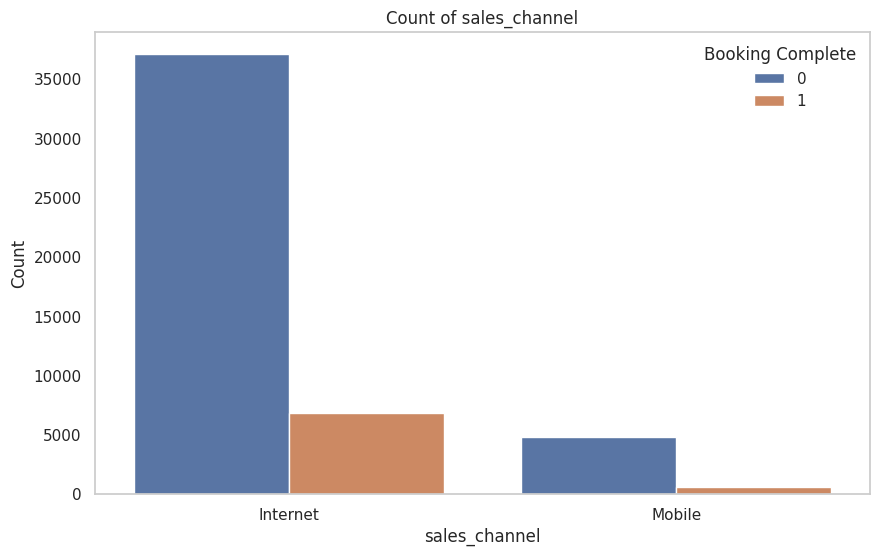

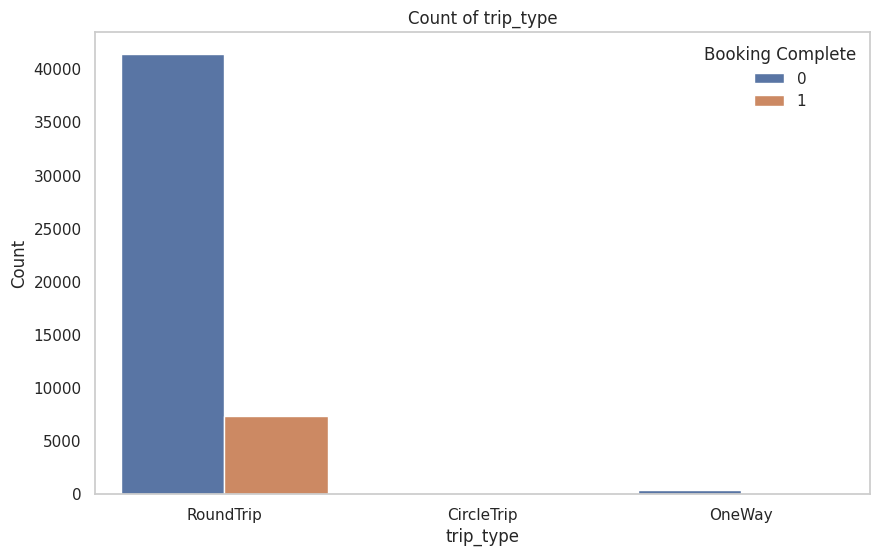

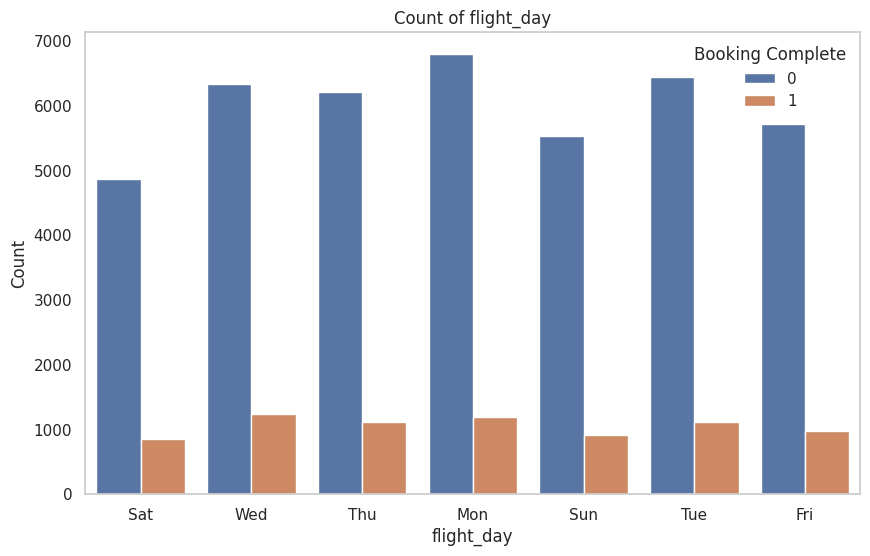

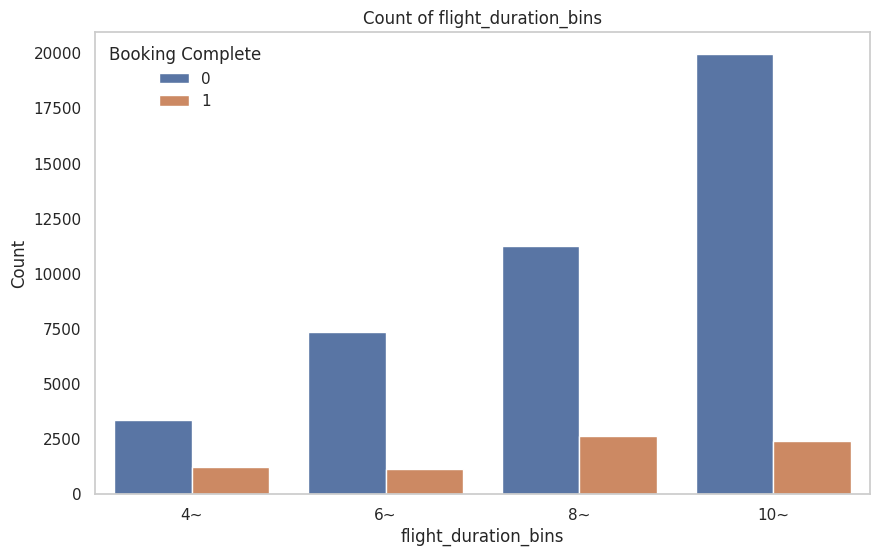

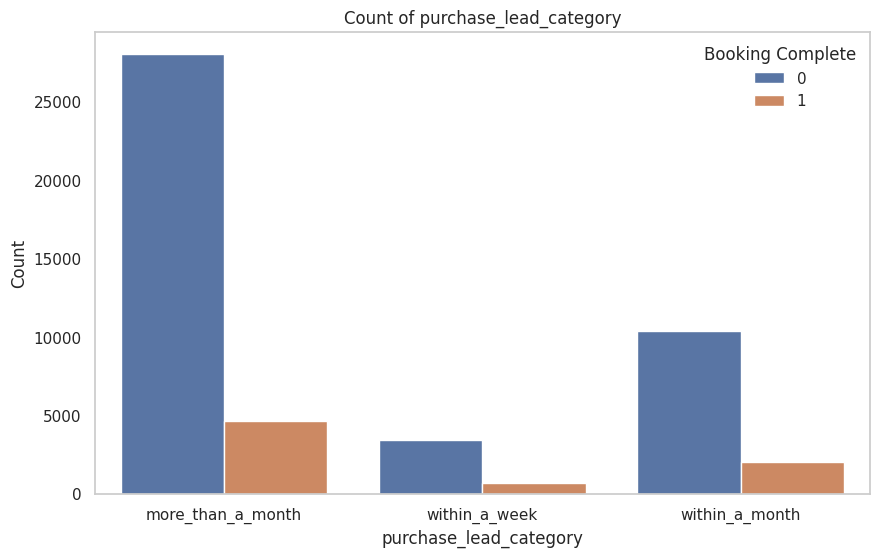

In [103]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of categorical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'flight_duration_bins', 'purchase_lead_category']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=feature, data=df_booking, hue='booking_complete')

    # Remove horizontal grid lines
    ax.yaxis.grid(False)

    # Customize further aspects of the plot
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Booking Complete', frameon=False)
    plt.show()

### Data Tables

In [104]:
# Group the dataset
data_pivot = df_booking.groupby(['booking_complete']).agg({"booking_complete":"count",
                                         "num_passengers":"mean",
                                         'purchase_lead': 'mean',
                                          'length_of_stay': 'mean',
                                          'flight_hour': 'mean',
                                          'flight_duration': 'mean'
                                                            }).T
data_pivot

booking_complete,0,1
booking_complete,41890.000000,7391.000000
num_passengers,1.579900,1.648491
purchase_lead,85.563762,79.959681
length_of_stay,23.651969,19.664727
flight_hour,9.055431,9.157083
flight_duration,7.346932,6.900475


In [105]:
# Group the dataset
data_pivot = df_booking.groupby(['booking_origin',"booking_complete"]).agg({"booking_complete":"count"})
data_pivot

booking_complete
booking_origin       booking_complete                  
(not set)            0                               64
                     1                               14
Afghanistan          0                                1
Algeria              0                                1
Argentina            0                                6
Australia            0                            16796
                     1                              895
Austria              0                                8
Bahrain              0                                2
                     1                                3
Bangladesh           0                               34
                     1                                2
Belarus              0                                1
Belgium              0                                6
                     1                                1
Bhutan               0                                1
Brazil               0                                9
Brunei               0                              121
                     1                               40
Bulgaria             0                                1
Cambodia             0                               95
                     1                               36
Canada               0                               55
                     1                                2
Chile                0                               16
                     1                                1
China                0                             2600
                     1                              684
Colombia             0                                4
Croatia              0                                2
Cyprus               0                                2
Czech Republic       0                                7
                     1                                1
Czechia              0                                1
Denmark              0                                4
                     1                                3
Egypt                0                                1
Estonia              0                                1
Finland              0                                8
France               0                               45
                     1                               13
Germany              0                               43
                     1                               11
Ghana                0                                1
Gibraltar            0                                1
Greece               0                                6
                     1                                1
Guam                 0                                2
Guatemala            0                                1
Hong Kong            0                              222
                     1                               72
Hungary              0                                3
India                0                             1130
                     1                              128
Indonesia            0                             1708
                     1                              609
Iran                 0                               14
Iraq                 1                                1
Ireland              0                                8
Israel               0                                2
Italy                0                               47
                     1                               11
Japan                0                             3347
                     1                              472
Jordan               0                                1
Kazakhstan           0                                1
                     1                                2
Kenya                0                                2
                     1                                1
Kuwait               0                                7
       

From above, we can say that almost in all countries reservations were not completed.

### Data Relationships

In [106]:
# Simply dataset only numeric ones
numeric_data = df_booking._get_numeric_data()

# Check numeric data colums
numeric_data.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'flight_day_weekend',
       'flight_minutes', 'passenger_x_baggage', 'passenger_x_meal',
       'passenger_x_seat'],
      dtype='object')

In [107]:
# Select the relevant features
numeric_data = df_booking[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
                           'flight_duration', 'flight_day_weekend', 'flight_minutes', 'passenger_x_baggage',
                           'passenger_x_meal', 'passenger_x_seat','booking_complete']]

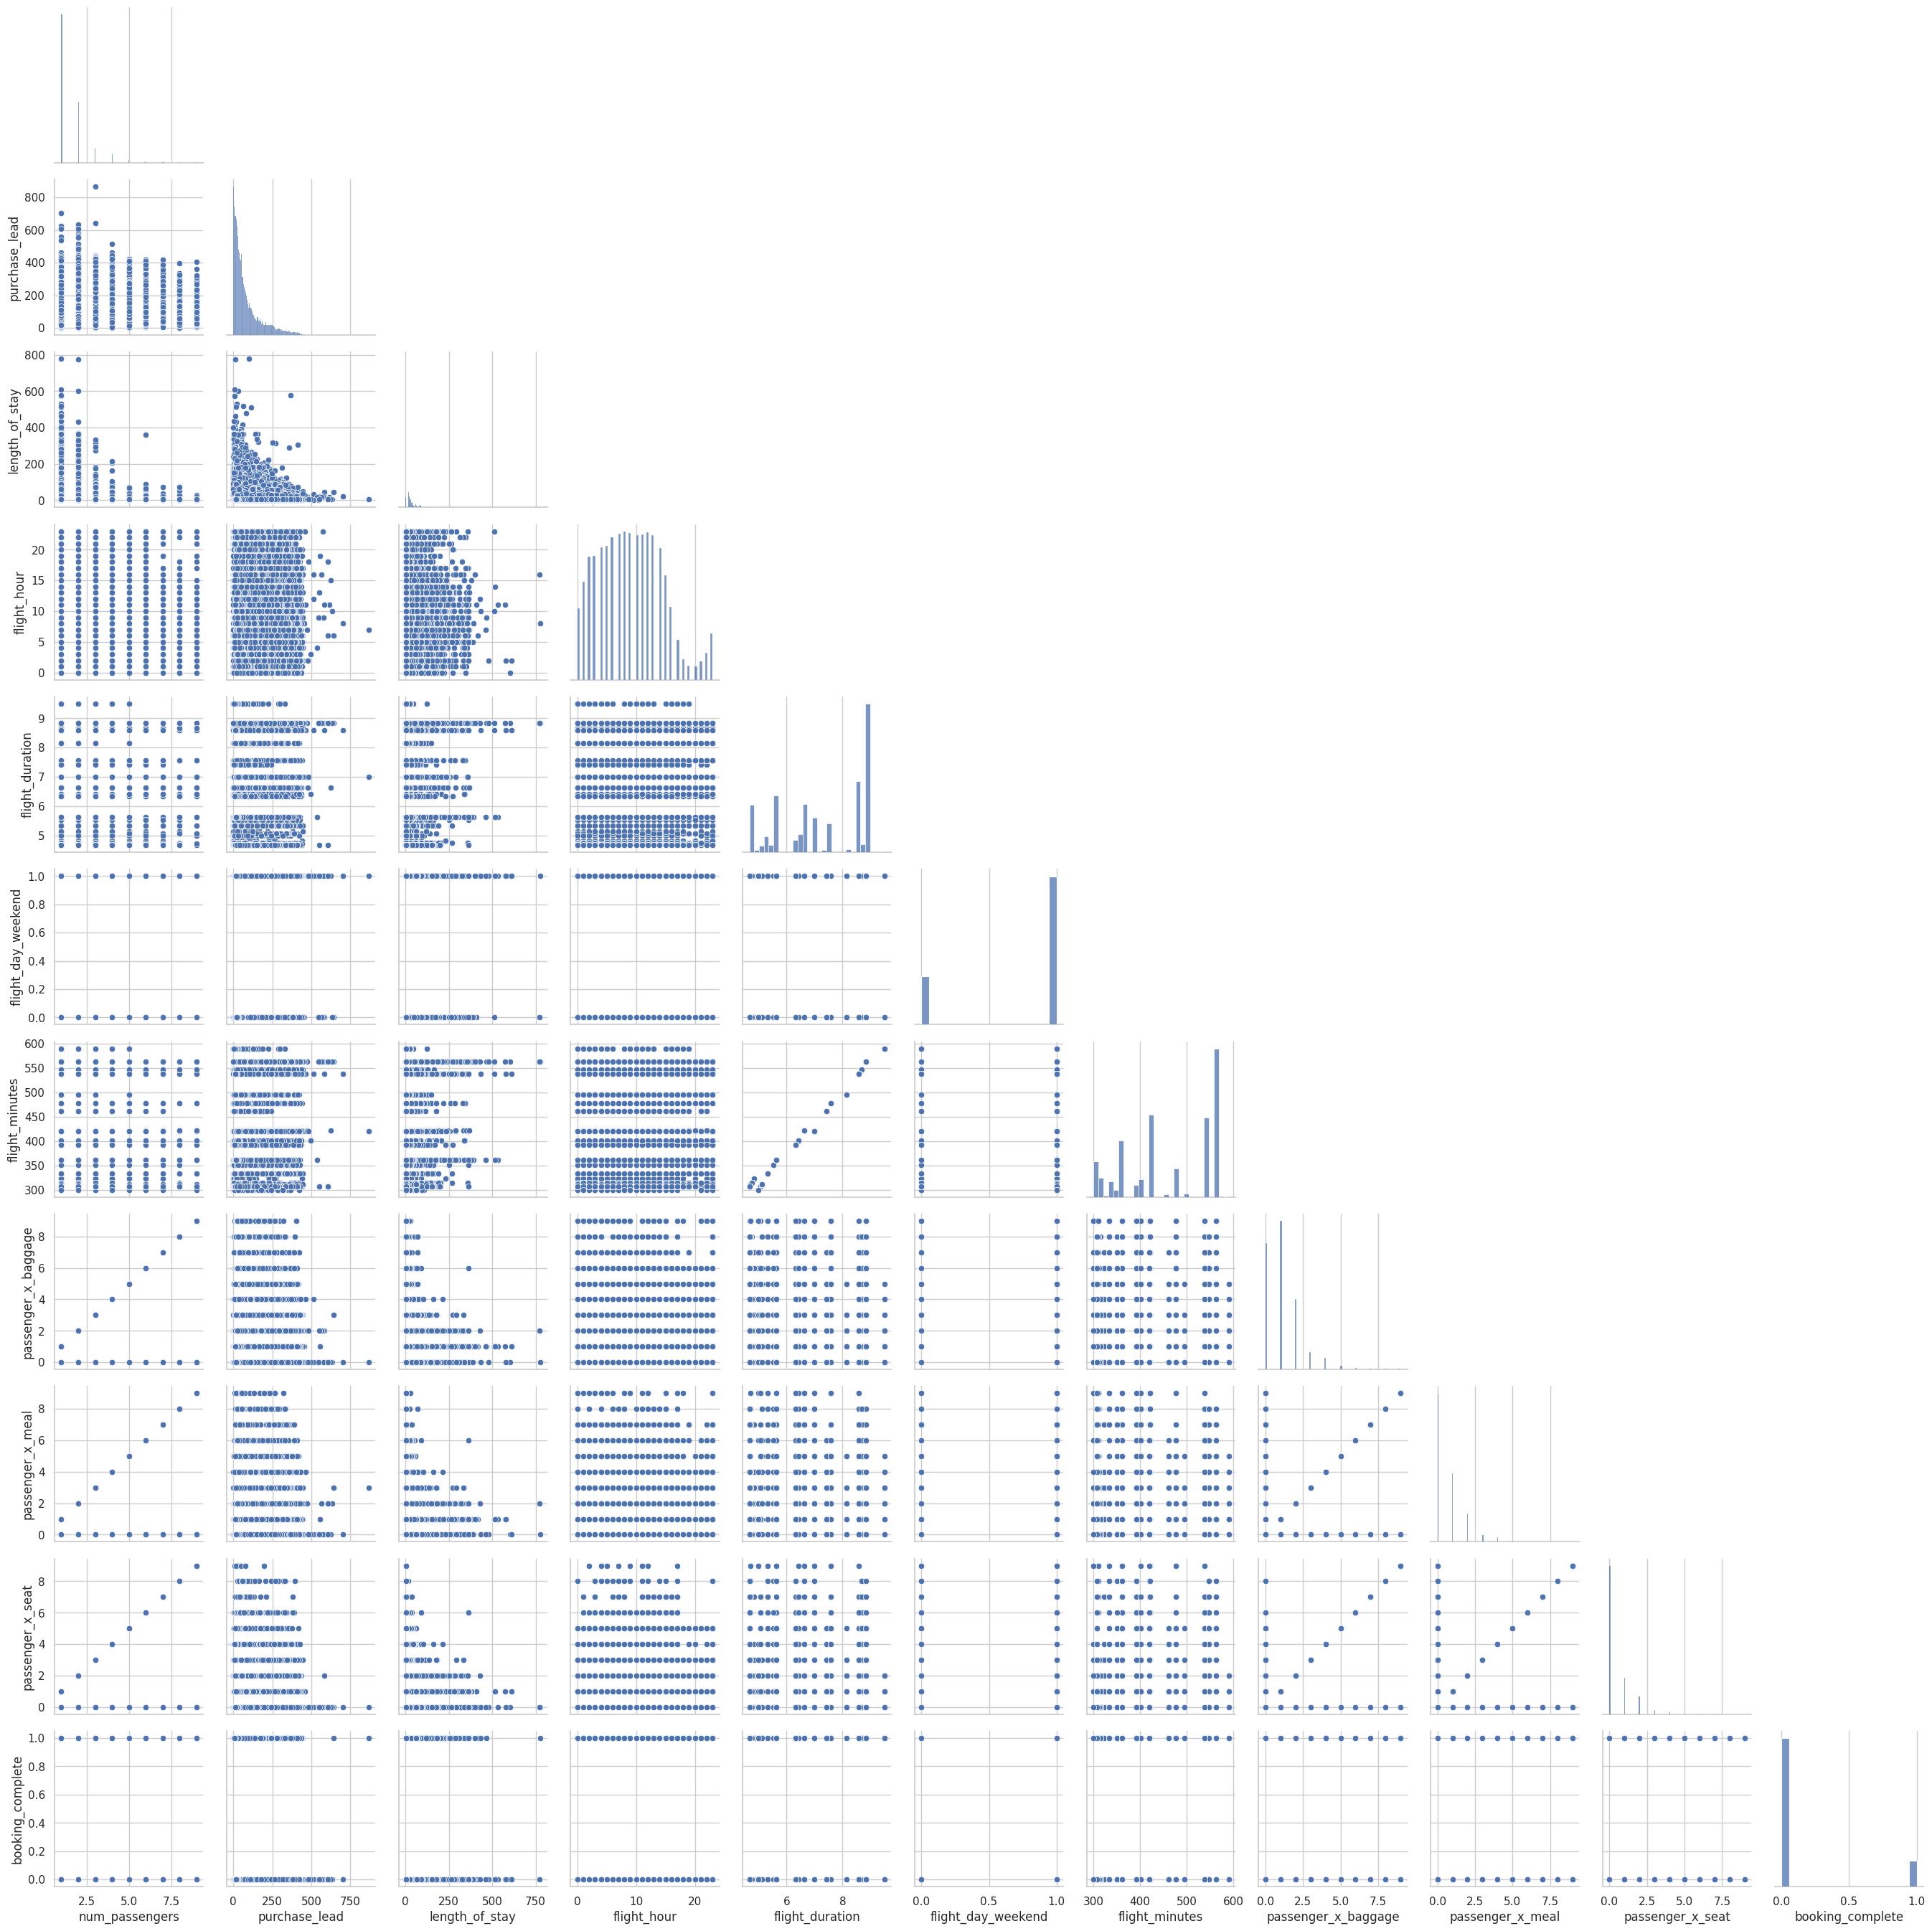

In [108]:
# Create a pairgrid
pairgrid = sns.PairGrid(numeric_data, diag_sharey = False, corner = True)
pairgrid.map_lower(sns.scatterplot)
pairgrid.map_diag(sns.histplot)

### Outlier Analysis

In [109]:
# Look at descriptive statistics again
# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{df_booking.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{df_booking.describe(include = object).transpose()}')

Dataset description:
Numerical Data
                         count        mean        std     min     25%     50%  \
num_passengers         49281.0    1.590187   1.016538    1.00    1.00    1.00   
purchase_lead          49281.0   84.723281  90.410229    0.00   21.00   51.00   
length_of_stay         49281.0   23.053976  33.832149    0.00    5.00   17.00   
flight_hour            49281.0    9.070676   5.413099    0.00    5.00    9.00   
wants_extra_baggage    49281.0    0.668229   0.470854    0.00    0.00    1.00   
wants_preferred_seat   49281.0    0.295631   0.456331    0.00    0.00    0.00   
wants_in_flight_meals  49281.0    0.426635   0.494593    0.00    0.00    0.00   
flight_duration        49281.0    7.279974   1.496390    4.67    5.62    7.57   
booking_complete       49281.0    0.149977   0.357052    0.00    0.00    0.00   
flight_day_weekend     49281.0    0.753150   0.431183    0.00    1.00    1.00   
flight_minutes         49281.0  460.804854  93.725741  300.00  362.00  47

In [110]:
# Define the variables for the box plots
boxplot_variables = ['purchase_lead', 'length_of_stay']

for variable in boxplot_variables:
  fig = px.box(df_booking, x=variable)
  fig.show()

In the above box plots, we can see that in some columns we have outliers that can effect the algorithm significantly. Let's modify outliers but it is important to know that also removing data leads to a lose of information so in some cases this is not allowed.



In [111]:
# Create list
list1 = ['purchase_lead', 'length_of_stay']
for item in list1:
  q1 = df_booking[item].quantile(.25)
  q3 = df_booking[item].quantile(.75)
  iqr = q3-q1

  lower = q1-(iqr*1.5)
  upper = q3+(iqr*1.5)

  # change the outliers value
  df_booking.loc[((df_booking[item]>upper), item)] = upper
  # number of outliers after changing their values
  print(f'Number of outliers in {item} column:',len(df_booking.loc[(df_booking[item]>upper)|(df_booking[item]<lower)]))

Number of outliers in purchase_lead column: 0
Number of outliers in length_of_stay column: 0


## Data Preprocessing

In [112]:
# First look at object types in our dataset
df_booking.select_dtypes(include='object')

,sales_channel,trip_type,flight_day,booking_origin,purchase_lead_category
0,Internet,RoundTrip,Sat,New Zealand,more_than_a_month
1,Internet,RoundTrip,Sat,New Zealand,more_than_a_month
2,Internet,RoundTrip,Wed,India,more_than_a_month
3,Internet,RoundTrip,Sat,New Zealand,more_than_a_month
4,Internet,RoundTrip,Wed,India,more_than_a_month
...,...,...,...,...,...
49995,Internet,RoundTrip,Sat,Australia,within_a_month
49996,Internet,RoundTrip,Sun,Australia,more_than_a_month
49997,Internet,RoundTrip,Sat,Australia,within_a_month
49998,Internet,RoundTrip,Mon,Australia,within_a_month


To go further we need to modify our object values for ML.

In [113]:
# Drop unnecessary columns
df_booking.drop(["flight_duration_bins","booking_origin",'sales_channel','trip_type'],axis=1,inplace = True)

# Encoding the other categoric features with more than two categories
df_booking = pd.get_dummies(df_booking, columns=['flight_day','purchase_lead_category'],dtype=int)

In [114]:
# Check dataframe
df_booking.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_weekend,flight_minutes,passenger_x_baggage,passenger_x_meal,passenger_x_seat,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,purchase_lead_category_more_than_a_month,purchase_lead_category_within_a_month,purchase_lead_category_within_a_week
0,2,256,19.0,7,1,0,0,5.52,0,0,351,2,0,0,0,0,1,0,0,0,0,1,0,0
1,1,112,20.0,3,0,0,0,5.52,0,0,351,0,0,0,0,0,1,0,0,0,0,1,0,0
2,2,243,22.0,17,1,1,0,5.52,0,1,351,2,0,2,0,0,0,0,0,0,1,1,0,0
3,1,96,31.0,4,0,0,1,5.52,0,0,351,0,1,0,0,0,1,0,0,0,0,1,0,0
4,2,68,22.0,15,1,0,1,5.52,0,1,351,2,2,0,0,0,0,0,0,0,1,1,0,0


## Correlation Analysis

In [115]:
# Checking the correlation between features
corr = df_booking.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

Correlation measures the linear relationship between two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of them. In our case, we can drop highly correlated features like flight_day_weekend, sales_channel_internet, sales_channel_mobile, trip_type_oneway.

Behaviour prediction is a binary classification problem, as customers either complete or not in a given period. Two questions need answering to guide model building:

Which features make customers complete booking or not?

What are the most important features to train a model with high performance?


In [116]:
# Prepare it for the logistic regression
logit_columns = [e for e in df_booking.columns if e != 'booking_complete']
X = df_booking[logit_columns]
y = df_booking['booking_complete']

# Add a constant to the features matrix
#X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.409128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       booking_complete   No. Observations:                49281
Model:                          Logit   Df Residuals:                    49260
Method:                           MLE   Df Model:                           20
Date:                Sat, 20 Jul 2024   Pseudo R-squ.:                 0.03203
Time:                        11:49:04   Log-Likelihood:                -20162.
converged:                       True   LL-Null:                       -20830.
Covariance Type:            nonrobust   LLR p-value:                1.181e-270
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
num_passengers                              -0.0

For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05, it means that the feature affects behaviour in a statistically significant way.

The second question about feature importance can be answered by looking at the chi2 test results. If the p-value is less than the threshold value which is 0.05 we can reject the null hypothesis and say that there is a significant relationship between the feature and the target variable.

In [117]:
# Create chi2 variable
chi_scores = chi2(X,y)
# Print chi2 scores
chi_scores

(array([1.85878282e+01, 2.19336443e+03, 4.47120030e+03, 7.15692801e+00,
        7.66104680e+01, 8.74388032e+01, 1.96917844e+01, 1.72013934e+02,
        7.22425196e-01, 1.10809576e+04, 2.10134809e+02, 8.64613757e+01,
        2.58417258e+02, 8.29872618e-01, 1.58188391e-02, 1.50753974e-02,
        3.70348519e+00, 1.23116939e-01, 3.18703412e-01, 9.53526574e+00,
        1.48571633e+01, 1.69495555e+01, 1.37204903e+01]),
 array([1.62253224e-05, 0.00000000e+00, 0.00000000e+00, 7.46749815e-03,
        2.08232948e-18, 8.69282314e-21, 9.09917126e-06, 2.68731135e-39,
        3.95349551e-01, 0.00000000e+00, 1.28367288e-47, 1.42493284e-20,
        3.79769553e-58, 3.62309365e-01, 8.99911642e-01, 9.02279800e-01,
        5.42989379e-02, 7.25678200e-01, 5.72387891e-01, 2.01560987e-03,
        1.15966813e-04, 3.83863074e-05, 2.12127488e-04]))

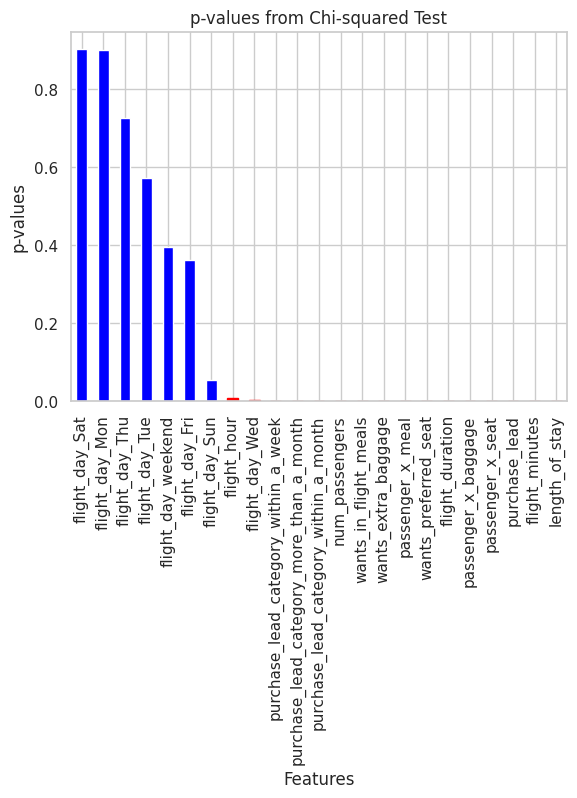

In [118]:
# Plot p-scores
# Code to calculate p_values
p_values = pd.Series(chi_scores[1], index=X.columns)

# Sorting the p-values in descending order
p_values.sort_values(ascending=False, inplace=True)

# Plotting the p-values as a bar plot
ax = p_values.plot(kind='bar', color='blue')

# Highlighting values under 0.05 by changing their color
threshold = 0.05
for bar in ax.patches:
    if bar.get_height() < threshold:
        bar.set_color('red')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('p-values')
plt.title('p-values from Chi-squared Test')
plt.show()

## Data Preparation for ML

### Split for Cross-Validation

In [119]:
df_booking.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'flight_day_weekend',
       'flight_minutes', 'passenger_x_baggage', 'passenger_x_meal',
       'passenger_x_seat', 'flight_day_Fri', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed', 'purchase_lead_category_more_than_a_month',
       'purchase_lead_category_within_a_month',
       'purchase_lead_category_within_a_week'],
      dtype='object')

In [120]:
df_booking = df_booking[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'booking_complete',
       'flight_minutes', 'passenger_x_baggage','passenger_x_meal', 'passenger_x_seat', 'flight_day_Fri', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed', 'purchase_lead_category_more_than_a_month',
       'purchase_lead_category_within_a_month',
       'purchase_lead_category_within_a_week']]

We extract a feature dataframe *X* and a dependent variable *y*.

In [121]:
# Split the Dependent Variable (y) from the Independent Variables (X)
y = df_booking['booking_complete']
X = df_booking.drop(columns=['booking_complete'])

Split the Dataset Into the Training Test and Test Set

[Train Test Split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

The Train-Test split follows a stratified approach.

*Stratified train-test split* is a technique used in machine learning to split a dataset into training and testing sets while maintaining the same class distribution or proportion of classes in both sets. This is particularly useful when dealing with imbalanced datasets, where the distribution of classes is unequal.

The stratified train-test split ensures that each class is represented in both the training and testing sets in roughly the same proportion as the original dataset. This helps to ensure that the model is trained and evaluated on representative samples from each class, which can lead to more reliable performance evaluation.

The process of performing a stratified train-test split involves the following steps:

1. Identify the feature column that represents the class labels or target variable.
2. Use the train_test_split function from the scikit-learn library with the parameter `stratify` set to the class labels column.
3. Specify the desired test set size or the proportion of the dataset to be allocated for testing.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

### Feature Scaling

The range of all features should be normalized so that each feature contributes approximately proportionately to the final distance, so we do feature scaling.

In [123]:
# Create an instance of the StandardScaler class
sc = StandardScaler()

In [124]:
# Create a list of non scaled numerical features
non_scaled_num_feature = ['num_passengers','purchase_lead','length_of_stay', 'flight_hour','flight_minutes',
                          'passenger_x_baggage','passenger_x_meal', 'passenger_x_seat'
                          ]

# Check first 5 rows of non-scaled numerical features
X_train[non_scaled_num_feature].head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_minutes,passenger_x_baggage,passenger_x_meal,passenger_x_seat
34200,1,149,4.0,9,362,1,0,0
510,2,46,46.0,10,563,2,2,0
9650,1,22,30.0,22,563,0,0,0
19645,1,41,37.0,12,563,1,0,0
45996,1,15,6.0,6,307,1,0,0


In [125]:
# Apply Feature Scaling to all the numerical features
# Just fit the training set since we don´t want the test set to be calculated in the mean and std dev
X_train[non_scaled_num_feature] = sc.fit_transform(X_train[non_scaled_num_feature])
X_test[non_scaled_num_feature] = sc.transform(X_test[non_scaled_num_feature])

In [126]:
# Verify first 5 rows of scaled numerical features
X_train[non_scaled_num_feature].head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_minutes,passenger_x_baggage,passenger_x_meal,passenger_x_seat
34200,-0.582047,0.900506,-0.841611,-0.010953,-1.057174,-0.103911,-0.657194,-0.523398
510,0.399627,-0.438839,1.445939,0.173743,1.087602,0.737971,1.256268,-0.523398
9650,-0.582047,-0.750919,0.574491,2.390093,1.087602,-0.945794,-0.657194,-0.523398
19645,-0.582047,-0.503855,0.955749,0.543134,1.087602,-0.103911,-0.657194,-0.523398
45996,-0.582047,-0.841942,-0.732680,-0.565041,-1.644053,-0.103911,-0.657194,-0.523398


## Model Implementation

### Pre-modeling Analysis

In [127]:
# Get the shape of the fully encoded matrix
print(f'The fully encoded feature matrix has {X_train.shape[1]} features and {X_train.shape[0]} instances.')

The fully encoded feature matrix has 18 features and 39424 instances.


Before modelling, an auxiliary function is defined to print more efficiently some significant performance metrics for the binary classification task.

In [128]:
###########################################################################################################
"""
    This function prints a summary of relevant performance metrics for the challenge's classification task.
    --
    In:
        * y_test: Dependent variable labels for the test set.
        * y_pred: Predicted values for the dependent variables.
    Out:
        * void
"""
###########################################################################################################

def evaluate_classifier(y_test, y_pred) :

  # Set display names to match the predicted variable 'Type' labels
  target_names = ['n', 'y']

  # Print a Classification report with several relevant metric scores per label
  print('Performance metrics summary:\n')
  print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

  # Display the Confusion Matrix
  print('Confusion Matrix:\n')
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
  plt.show()

An auxiliary function for plotting the class distribution of a categorial variable is also created.

In [129]:
###########################################################################################################
"""
    This function plots the distribution of the labels for a categorical feature.
    --
    In:
        * y: Feature vector.
    Out:
        * void
"""
###########################################################################################################

def plot_class_distribution(y) :

  # Get the instances count per unique class
  unique, counts = np.unique(y, return_counts=True)
  unique_count = dict(zip(unique, counts))

  # Get the plotting data as lists
  names = list(unique_count.keys())
  values = list(unique_count.values())

  # Display the distribution graph
  plt.bar(range(len(unique_count)), values, tick_label=names)
  plt.show()

As we noticed before in the Data Analysis section, the dependent variable label distribution is quite imbalanced so we plot it directly to strenghten the point that some measures have to be taken to consider this in the model selection.

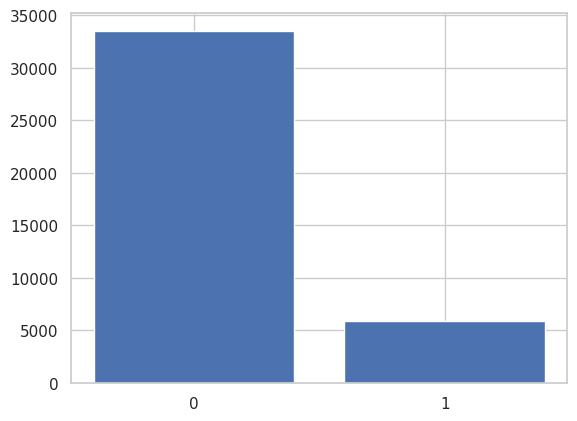

In [130]:
# Plot distribution of dependent variable labels in training set
plot_class_distribution(y_train)

### Single Predictors

In [131]:
from imblearn.under_sampling import RandomUnderSampler
# Instantiate the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

# Fit and resample the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.893     0.610     0.725      8379
           y      0.210     0.588     0.309      1478

    accuracy                          0.606      9857
   macro avg      0.552     0.599     0.517      9857
weighted avg      0.791     0.606     0.662      9857

Confusion Matrix:



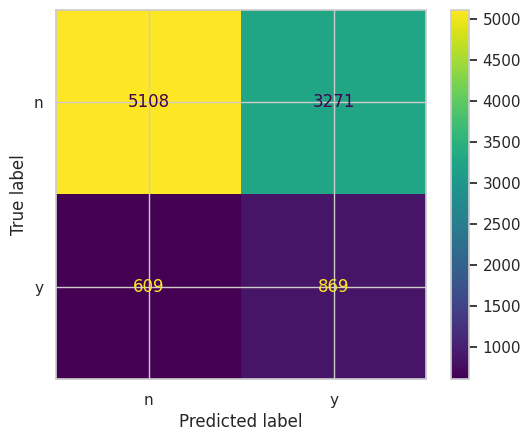

In [132]:
# Create a Random Forest Classifier, fit the training data and predict 'y'
rf_classifier = RandomForestClassifier(n_estimators = 120, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = rf_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Best parameters found:
{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 120}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.893     0.610     0.725      8379
           y      0.210     0.588     0.309      1478

    accuracy                          0.606      9857
   macro avg      0.552     0.599     0.517      9857
weighted avg      0.791     0.606     0.662      9857

Confusion Matrix:



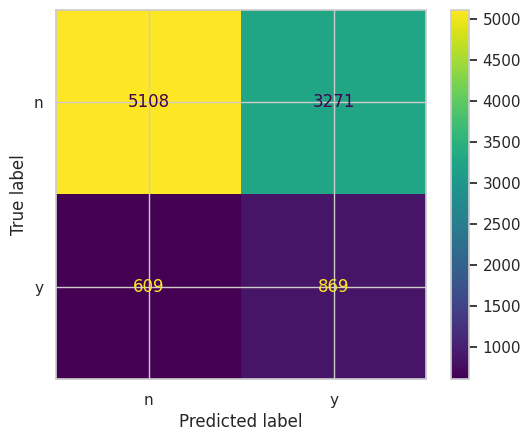

In [133]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state = 0)

# Define a parameter grid for the grid search
rf_param_grid = {
    'n_estimators': [60, 90, 120, 150, 180],
    'criterion': ["gini", "entropy","log_loss"],
    'class_weight': [None, "balanced", "balanced_subsample"]}

# Perform grid search
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train_resampled, y_train_resampled)
print(f'Best parameters found:\n{rf_grid_search.best_params_}\n')

# Predict 'y'
y_pred = rf_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.893     0.610     0.725      8379
           y      0.210     0.588     0.309      1478

    accuracy                          0.606      9857
   macro avg      0.552     0.599     0.517      9857
weighted avg      0.791     0.606     0.662      9857

Confusion Matrix:



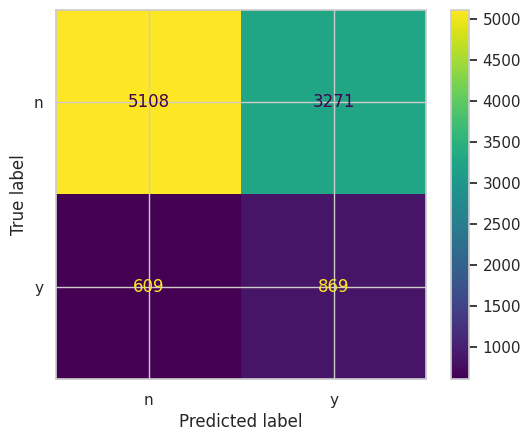

In [137]:
# Create a RandomForest Classifier again with the best hyperparameters, fit the training data and predict 'y'
rf_classifier = RandomForestClassifier(n_estimators = 120, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = rf_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

In [138]:
# Initialise the KFold parameters
kfold = KFold(n_splits=5, random_state=7,shuffle = True)

# Perform K-Fold Cross Validation
results = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=kfold)

# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 60.02% (0.92%)


##### Feature Importance

We have plotted the features and sorted them based on their importance.

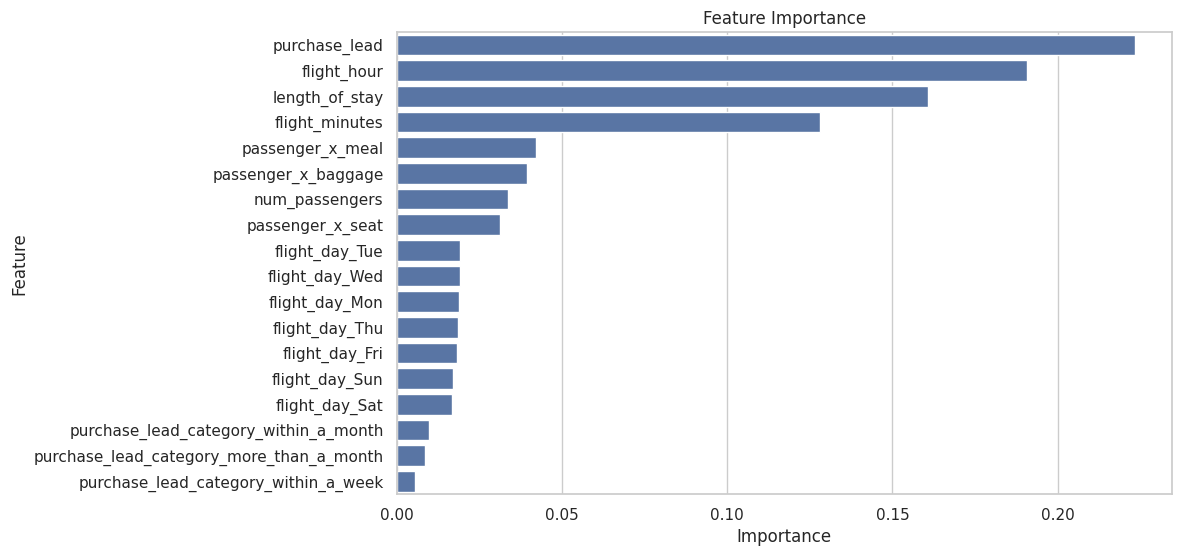

In [139]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()